In [180]:
# common packages
import numpy as np
import os
import sys
from typing import List

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# reading in dicom files
import pydicom

# ipywidgets for some interactive plots
from ipywidgets.widgets import * 
import ipywidgets as widgets

# skimage image processing packages
from skimage import measure, morphology
#from skimage.morphology import ball, binary_closing
#from skimage.measure import label, regionprops

### Load Dicom files and return list of slices of type pydicom.Filedataset

In [181]:
def load_scan(dicom_files_path: str) -> List[pydicom.FileDataset]:
    slices = [pydicom.dcmread(dicom_files_path + '/' + s) for s in
              os.listdir(dicom_files_path)]
    # Sort with Acquisition Number
    slices.sort(key = lambda x: int(x.AcquisitionNumber))

    return slices

In [182]:
def preprocess_scans(scans: List[pydicom.FileDataset]) -> np.ndarray:
    # Rotate images by 180 degree
    images = np.stack([np.rot90(s.pixel_array,2) for s in scans])
    # np.set_printoptions(threshold = False)
    # np.set_printoptions(threshold=sys.maxsize)
    print(images.shape)
    print(images[0])

    # Substance 	HU
    # Air 	-1000
    # Fat 	-120
    # Water 	0
    # Muscle 	+40
    # Contrast 	+130
    # Bone 	+400 or more

    # Convert to Hounsfield units (HU)
    #intercept = scans[0].RescaleIntercept

    #images += np.int16(intercept)

    return np.array(images, dtype=np.int16)

(384, 256, 256)
[[-1000 -1000 -1000 ... -1000 -1000 -1000]
 [-1000 -1000 -1000 ... -1000 -1000 -1000]
 [-1000 -1000 -1000 ... -1000 -1000 -1000]
 ...
 [-1000 -1000 -1000 ... -1000 -1000 -1000]
 [-1000 -1000 -1000 ... -1000 -1000 -1000]
 [-1000 -1000 -1000 ... -1000 -1000 -1000]]


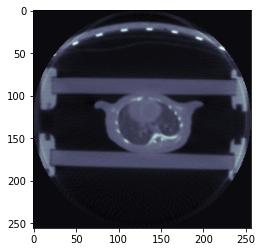

In [183]:
# set path and load files
path_of_dicom_dir = '../data/'
patient_dicom = load_scan(path_of_dicom_dir)
patient_pixels = preprocess_scans(patient_dicom)
#sanity check
plt.imshow(patient_pixels[150], cmap=plt.cm.bone)

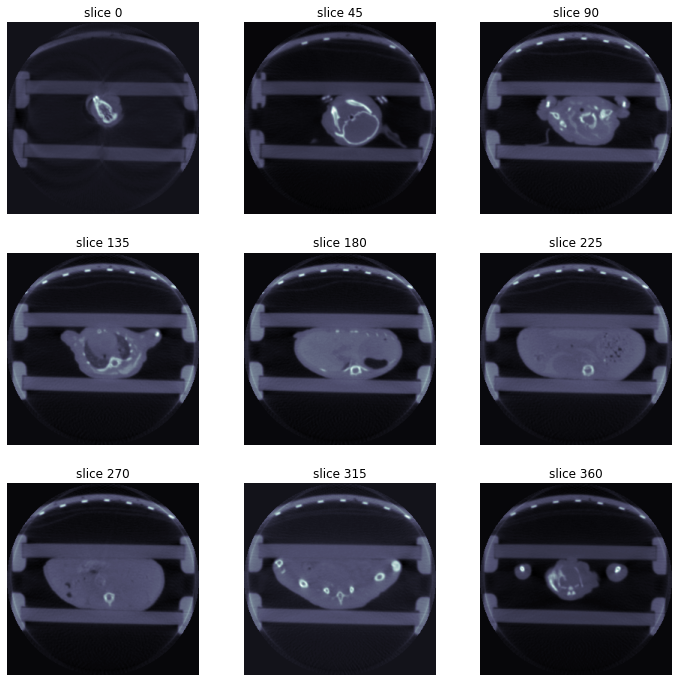

In [184]:
def sample_stack(stack, rows=3, cols=3, start_with=0, show_every=45):
    fig,ax = plt.subplots(rows,cols,figsize=[12,12])
    for i in range(rows*cols):
        ind = start_with + i*show_every
        ax[int(i/rows),int(i % rows)].set_title('slice %d' % ind)
        ax[int(i/rows),int(i % rows)].imshow(stack[ind],cmap='bone')
        ax[int(i/rows),int(i % rows)].axis('off')
    plt.show()

sample_stack(patient_pixels)

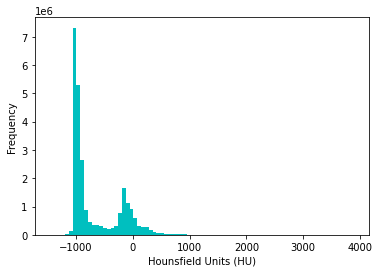

In [185]:
def plot_histogram():
    plt.hist(patient_pixels.flatten(), bins=80, color='c')
    plt.xlabel("Hounsfield Units (HU)")
    plt.ylabel("Frequency")
    plt.show()
    
plot_histogram()

In [186]:
plt.figure(1)
def dicom_animation(x):
    plt.imshow(patient_pixels[x])
    return x
interact(dicom_animation, x=(0, len(patient_pixels)-1))

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=191, description='x', max=383), Output()), _dom_classes=('widget-interac…

<function __main__.dicom_animation(x)>

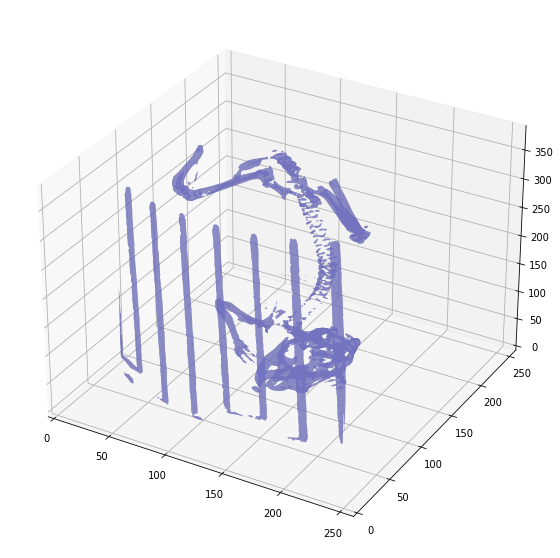

In [187]:
def plot_3d(image, threshold=950):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the   
    # camera
    p = image.transpose(2,1,0)
    
    verts, faces, _, _ = measure.marching_cubes(p, threshold)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    # Fancy indexing: `verts[faces]` to generate a collection of    
    # triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    plt.show()
# run visualization 
plot_3d(patient_pixels)

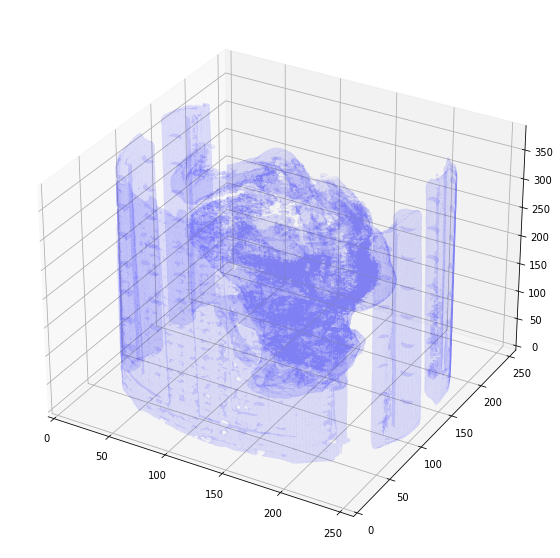

In [188]:
def plot_3d(image, threshold=0):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the   
    # camera
    p = image.transpose(2,1,0)
    
    verts, faces, _, _ = measure.marching_cubes(p, threshold)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    # Fancy indexing: `verts[faces]` to generate a collection of    
    # triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.10)
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    plt.show()
# run visualization 
plot_3d(patient_pixels)

In [189]:
import SimpleITK as sitk
import itkwidgets

# Get the DICOM file names in the current directory
names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames('../data/')

# Read the DICOM series
reader = sitk.ImageSeriesReader()
reader.SetFileNames(names)
img = reader.Execute()

itkwidgets.view(img)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageSS3; pr…

In [190]:
import ipyvolume as ipv

ipv.figure()
ipv.scatter(patient_pixels[0], patient_pixels[1], patient_pixels[2], color='blue', marker='sphere', size=15)
ipv.show()

In [163]:
import ipyvolume as ipv

ipv.figure()
ipv.scatter(patient_pixels[0], patient_pixels[1], patient_pixels[2], color='blue', marker='sphere', size=15)
ipv.show()